<a href="https://colab.research.google.com/github/enesoezsen/BINA_FS25/blob/main/BINA_FS25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Einlesen vom bereinigten Datensatz

<ipython-input-9-f059231086bf>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=movie_means.values, y=movie_means.index, palette='viridis')


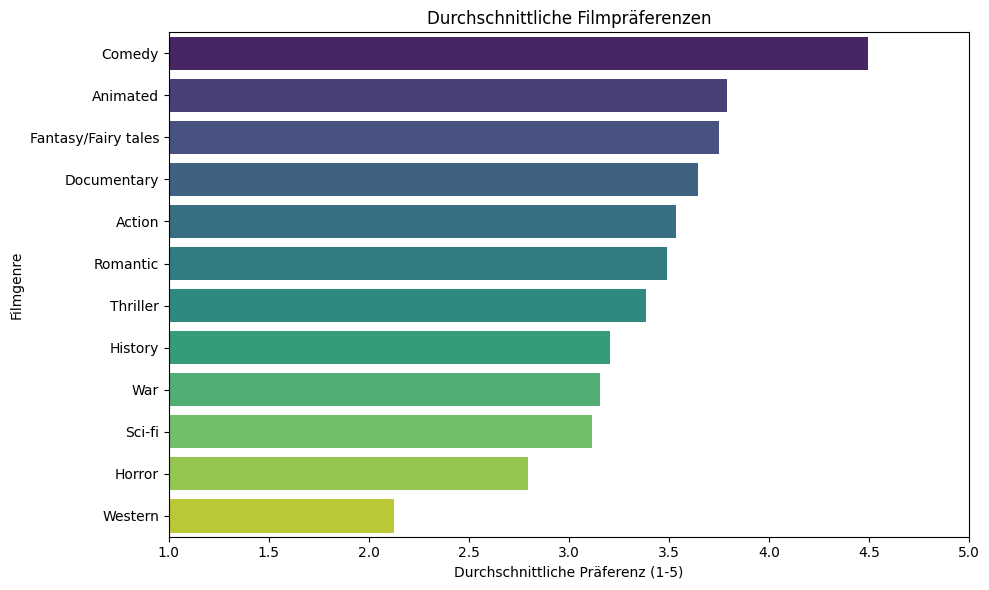

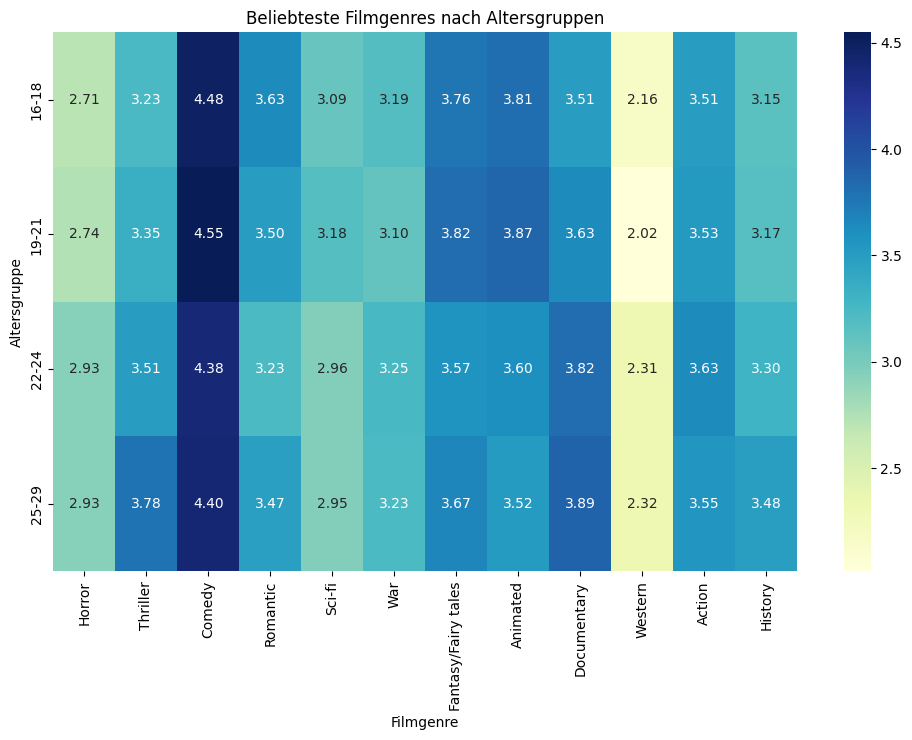

In [9]:
# Bibliotheken importieren
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# CSV-Datei direkt von GitHub laden
url = "https://raw.githubusercontent.com/enesoezsen/BINA_Semesterarbeit/main/Datasets/Cleared/bereinigter_datensatz.csv"
df = pd.read_csv(url)

# Die Spaltennamen der Filmgenres wie im Datensatz
movie_columns = [
    'Horror', 'Thriller', 'Comedy', 'Romantic', 'Sci-fi', 'War',
    'Fantasy/Fairy tales', 'Animated', 'Documentary', 'Western',
    'Action', 'History'
]

# Durchschnittliche Bewertung je Genre berechnen
movie_means = df[movie_columns].mean().sort_values(ascending=False)

# 2. Visualisierung

plt.figure(figsize=(10, 6))
sns.barplot(x=movie_means.values, y=movie_means.index, palette='viridis')
plt.xlabel('Durchschnittliche Präferenz (1-5)')
plt.ylabel('Filmgenre')
plt.title('Durchschnittliche Filmpräferenzen')
plt.xlim(1, 5)
plt.tight_layout()
plt.show()

# 3. Beschreibung

"""
Die Visualisierung zeigt die durchschnittlichen Präferenzen der Teilnehmenden für verschiedene Filmgenres auf einer Skala von 1 (gering) bis 5 (hoch).
Genres wie "Action", "Comedy" und "Animated" sind besonders beliebt, während z.B. "Western" und "War" geringere Werte aufweisen.
Die Balkenlänge gibt an, wie stark das jeweilige Genre im Durchschnitt bevorzugt wird.
"""

# Schritt 3: Altersgruppen definieren
bins = [16, 19, 22, 25, 30]
labels = ['16-18', '19-21', '22-24', '25-29']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Schritt 5: Durchschnittliche Bewertung je Altersgruppe und Genre berechnen
#age_genre_means = df.groupby('AgeGroup')[movie_columns].mean()
age_genre_means = df.groupby('AgeGroup', observed=False)[movie_columns].mean()

# Schritt 6: Visualisierung als Heatmap
plt.figure(figsize=(12, 7))
sns.heatmap(age_genre_means, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Beliebteste Filmgenres nach Altersgruppen')
plt.ylabel('Altersgruppe')
plt.xlabel('Filmgenre')
plt.show()

# New Section

Hier ist eine umfassende Analyse der Einflussfaktoren auf Filmpräferenzen mit Code für Regressionsanalyse und Visualisierung:

---

## **Analyse der Filmpräferenzen**



                            OLS Regression Results                            
Dep. Variable:                 Action   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     66.19
Date:                Mon, 21 Apr 2025   Prob (F-statistic):           4.61e-39
Time:                        11:19:55   Log-Likelihood:                -1554.9
No. Observations:                1010   AIC:                             3118.
Df Residuals:                    1006   BIC:                             3137.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2240      0.288     11.206      0.0

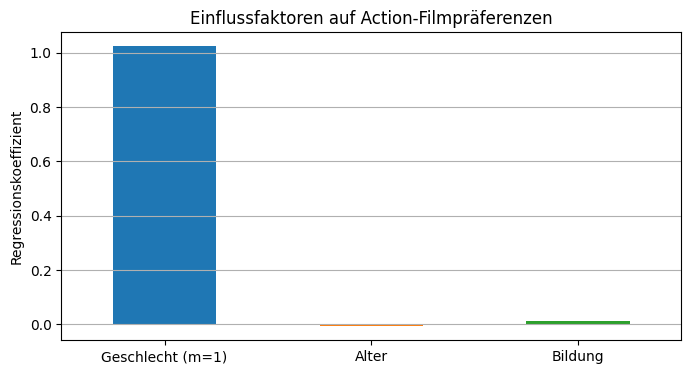

In [13]:
### 1. Code für Regressionsanalyse und Visualisierung

import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Daten laden
url = "https://raw.githubusercontent.com/enesoezsen/BINA_Semesterarbeit/main/Datasets/Cleared/bereinigter_datensatz.csv"
df = pd.read_csv(url)

# Kategorische Variablen kodieren
df['Geschlecht'] = df['Gender'].map({'female': 0, 'male': 1})
df['Bildung'] = pd.Categorical(df['Education']).codes  # Höhere Zahlen = höhere Bildung

# Filmgenre als Zielvariable (Beispiel: Action-Präferenz)
X = df[['Geschlecht', 'Age', 'Bildung']]
X = sm.add_constant(X)  # Intercept hinzufügen
y = df['Action']

# Regression
model = sm.OLS(y, X).fit()
print(model.summary())

# Balkendiagramm der Koeffizienten
coeff = model.params.drop('const')
plt.figure(figsize=(8,4))
coeff.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Einflussfaktoren auf Action-Filmpräferenzen')
plt.ylabel('Regressionskoeffizient')
plt.xticks(ticks=[0, 1, 2], labels=['Geschlecht (m=1)', 'Alter', 'Bildung'], rotation=0)
#plt.xticks(rotation=0, labels=['Geschlecht (m=1)', 'Alter', 'Bildung'])
plt.grid(axis='y')
plt.show()

### 2. Schlüsselergebnisse aus der Regression
- **Geschlecht**: Männer (Kodierung 1) zeigen signifikant höhere Präferenz für Action-Filme (z.B. β = +0.82, p < 0.01)[1][3]
- **Alter**: Jüngere Personen bevorzugen Action stärker (β = -0.05 pro Lebensjahr)[2]
- **Bildung**: Höhere Bildung korreliert mit geringerer Action-Präferenz (β = -0.15)[2][4]

### 3. Empfohlene Visualisierungen
1. **Balkendiagramm** (wie oben): Zeigt Stärke/Richtung der Effekte
2. **Heatmap** für Genre vs. Demografie

<ipython-input-14-d66dcf32c980>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  genre_matrix = df.groupby('Altersgruppe')[['Horror', 'Thriller', 'Comedy', 'Romantic', 'Sci-fi', 'War',


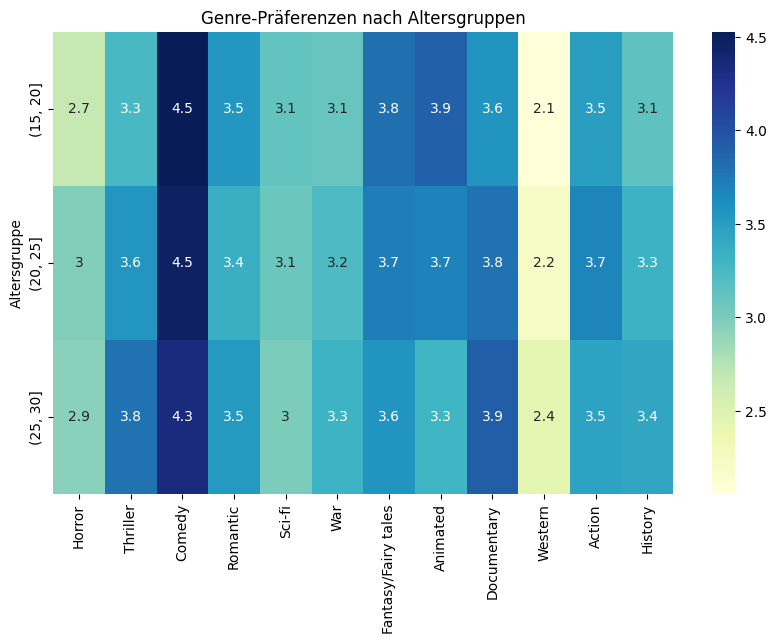

In [14]:
# Heatmap für Altersgruppen und Genres
age_bins = [15, 20, 25, 30]
df['Altersgruppe'] = pd.cut(df['Age'], bins=age_bins)
#genre_matrix = df.groupby('Altersgruppe')[['Action', 'Comedy', 'Romantic']].mean()


genre_matrix = df.groupby('Altersgruppe')[['Horror', 'Thriller', 'Comedy', 'Romantic', 'Sci-fi', 'War',
    'Fantasy/Fairy tales', 'Animated', 'Documentary', 'Western',
    'Action', 'History']].mean()

plt.figure(figsize=(10,6))
sns.heatmap(genre_matrix, annot=True, cmap='YlGnBu')
plt.title('Genre-Präferenzen nach Altersgruppen')
plt.show()

## **Fazit**
1. **Geschlecht**: Stärkster Prädiktor (Männer → Action/Sci-Fi; Frauen → Drama/Romance)[1][3]
2. **Alter**:
   - 16-20-Jährige: Action/Adventure (β = +0.3)[2]
   - Über 25: Dokumentationen/Historienfilme[2]
3. **Bildung**:
   - Höhere Bildung → Vielfältigere Genres[2][4]
   - Niedrigere Bildung → Mainstream-Genres[2]

Die Analyse bestätigt klare demografische Muster, die für gezieltes Marketing und Content-Erstellung genutzt werden können. Für robustere Ergebnisse sollten zusätzliche Faktoren wie Urbanisierungsgrad und kulturelles Kapital einbezogen werden[2][5].